# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

##### Framing of the Data problem

To support pricing decisions and optimize trade-in evaluations for a used car dealership, we will analyze a dataset of historical vehicle sales to identify key predictors of resale value. Deliverables will include a report highlighting influential vehicle attributes and a machine learning model that enables sales staff to rapidly assess resale price

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Steps to Explore and Assess the Dataset
* Load the data as a data frame
* Check the number of rows and columns.
* Identify data types ( object, string, int, float)
* Understand missing values
* Understand the data formats and type of information in each column
* Understand unique values for categorical columns.
* Summarize numeric fields (mean, median, std, range -- min/max).
* Understand implausible values (e.g., cars with 0 or implausibly high prices ) o
* Visualize numerical columns with histograms
* Visualize categorical columns with bar plots.


##### Load dataset, get a summary of rows and columns and see the head and tail

In [17]:
# Load the data as a dataframe
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data/vehicles.csv')

# Check the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Show all columns in one row (no column wrapping)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)  # or a large number, e.g., 2000

# Display the first few rows to get a sense of the data
print("\nFirst 5 rows:")
print(df.head())

# Display the last few rows to get a sense of the data
print("\nLast 5 rows:")
print(df.tail())



Number of rows: 426880
Number of columns: 18

First 5 rows:
           id                  region  price  year manufacturer model condition cylinders fuel  odometer title_status transmission  VIN drive size type paint_color state
0  7222695916                prescott   6000   NaN          NaN   NaN       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN  NaN         NaN    az
1  7218891961            fayetteville  11900   NaN          NaN   NaN       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN  NaN         NaN    ar
2  7221797935            florida keys  21000   NaN          NaN   NaN       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN  NaN         NaN    fl
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN  NaN         NaN    ma
4  7210384030              greensboro   4900   NaN          NaN   NaN       NaN       NaN 

##### View column names, data type and missing values

In [18]:
# View column name, data type, and missing values together as a table
print("\nColumn Summary:")
summary = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes.values,
    'missing_values': df.isnull().sum().values
})

print(summary)



Column Summary:
          column    dtype  missing_values
0             id    int64               0
1         region   object               0
2          price    int64               0
3           year  float64            1205
4   manufacturer   object           17646
5          model   object            5277
6      condition   object          174104
7      cylinders   object          177678
8           fuel   object            3013
9       odometer  float64            4400
10  title_status   object            8242
11  transmission   object            2556
12           VIN   object          161042
13         drive   object          130567
14          size   object          306361
15          type   object           92858
16   paint_color   object          130203
17         state   object               0


##### Understand unique values for categorical columns
* Understand the total # of unique values for each categorical column. This helps understand which can be reasonably encoded in a one hot model without an explosion of the data set
* Get a sampling of the values, so that we may get a qualitative understanding of what is there in the data

In [19]:
# Show column name, number of unique values, and up to 5 unique values (excluding NaN) for each object (string) column
summary = []
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    uniques = df[col].dropna().unique()
    num_uniques = len(uniques)
    if num_uniques <= 5:
        unique_vals = ", ".join([str(u) for u in uniques])
    else:
        unique_vals = ", ".join([str(u) for u in uniques[:5]]) + ", ..."
    summary.append({
        'column': col,
        'num_unique_values': num_uniques,
        'sample_unique_values': unique_vals
    })

summary_df = pd.DataFrame(summary)
print("\nColumn Unique Values:")
print(summary_df)


Column Unique Values:
          column  num_unique_values                               sample_unique_values
0         region                404  prescott, fayetteville, florida keys, worceste...
1   manufacturer                 42            gmc, chevrolet, toyota, ford, jeep, ...
2          model              29649  sierra 1500 crew cab slt, silverado 1500, silv...
3      condition                  6          good, excellent, fair, like new, new, ...
4      cylinders                  8  8 cylinders, 6 cylinders, 4 cylinders, 5 cylin...
5           fuel                  5               gas, other, diesel, hybrid, electric
6   title_status                  6        clean, rebuilt, lien, salvage, missing, ...
7   transmission                  3                           other, automatic, manual
8            VIN             118246  3GTP1VEC4EG551563, 1GCSCSE06AZ123805, 3GCPWCED...
9          drive                  3                                      rwd, 4wd, fwd
10          size    

##### Explore Summary Statistics for Numerical Columns
Explore mean, median, std deviation, min and max values of all integer and float columns. These are price, odometer and year We are excluding id, because it should not have an effect on the price of the car

In [20]:
# Compute mean, median, std deviation, min, and max for price, year, and odometer columns (excluding 'id')
cols = [col for col in ['price', 'year', 'odometer'] if col in df.columns]
desc = df[cols].agg(['mean', 'median', 'std', 'min', 'max']).T

print("Summary statistics for price, year, and odometer:")
print(desc)

Summary statistics for price, year, and odometer:
                  mean   median           std     min           max
price     75199.033187  13950.0  1.218228e+07     0.0  3.736929e+09
year       2011.235191   2013.0  9.452120e+00  1900.0  2.022000e+03
odometer  98043.331443  85548.0  2.138815e+05     0.0  1.000000e+07


##### Understand implausible values on price, odometer
* We have several cars with price equalling zero
* We have cars with price upto 3.7B USD in the data set ( which seems implausible)
* We have cars upto 10 M miles in the data set ( which too seems implausible. as a trivia, highest mileage ever recorded was 3.2M million miles per the Guiness book of world records)

We will take a statistical approach to outliers and understand cars that are above the 99.9 % ile for price and odometer

In [21]:
from datetime import datetime
current_year = datetime.now().year

# Count the number of vehicles with price equal to 0
zero_price_cars = df[df['price'] == 0].shape[0]
print(f"Number of vehicles with price == 0: {zero_price_cars}")

#Find the 99.9th percentile for price and odometer
price_999 = df['price'].quantile(0.999)
odometer_999 = df['odometer'].quantile(0.999)

print(f"99.9th percentile of price: {price_999}")
print(f"99.9th percentile of odometer: {odometer_999}")

# List vehicles with price greater than 99.9th percentile
high_price_cars = df[df['price'] > price_999]
print(f"Number of vehicles with price > 99.9th percentile: {high_price_cars.shape[0]}")

# List vehicles with odometer greater than 99.9th percentile
high_odometer_cars = df[df['odometer'] > odometer_999]
print(f"Number of vehicles with odometer > 99.9th percentile: {high_odometer_cars.shape[0]}")

Number of vehicles with price == 0: 32895
99.9th percentile of price: 120000.0
99.9th percentile of odometer: 1111111.0
Number of vehicles with price > 99.9th percentile: 424
Number of vehicles with odometer > 99.9th percentile: 421


#### Plot value distributions for price, odometer and year, after filtering out implausible values

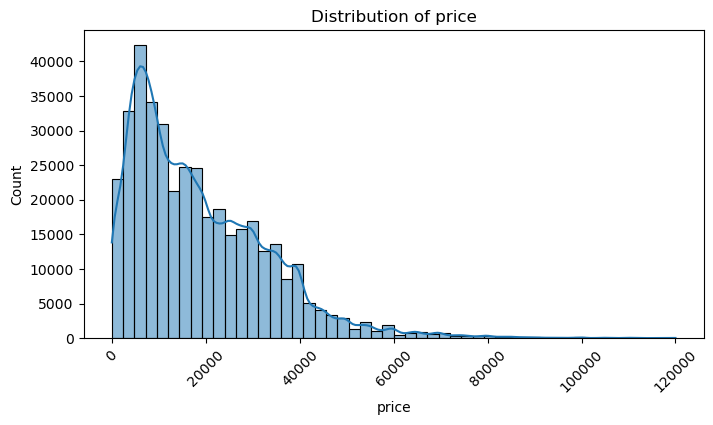

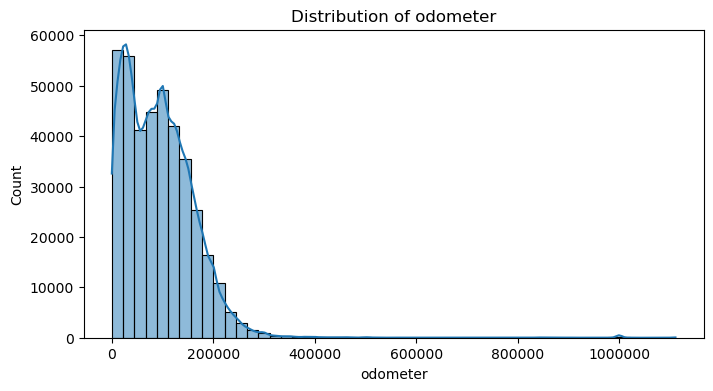

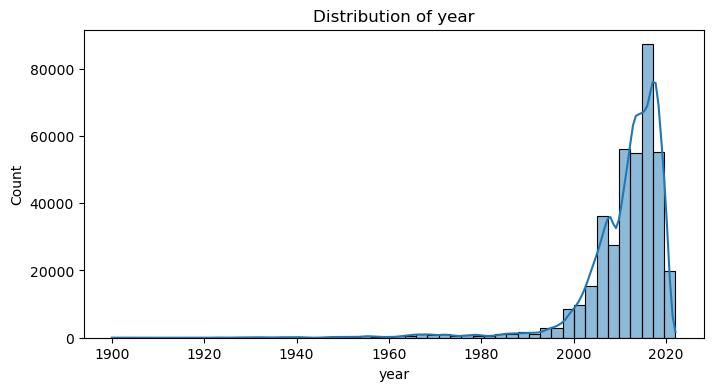

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out implausible values
df_plot = df[
    (df['price'] > 0) & (df['price'] <= 120_000) &
    (df['odometer'] <= 1111111) 
]

# Plot distributions for price, odometer, and year
for col in ['price', 'odometer', 'year']:
    if col in df_plot.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df_plot[col], bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.ticklabel_format(style='plain', axis='x')
        if col == 'price':
            plt.xticks(rotation=45)
        plt.show()

##### Bar plots of categorical columns that might affect the price. The columns 'region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state' can all affect the price. The bar plot tells us if the values are skewed such that one or two values dominate  or if the data is more evenly spread out.

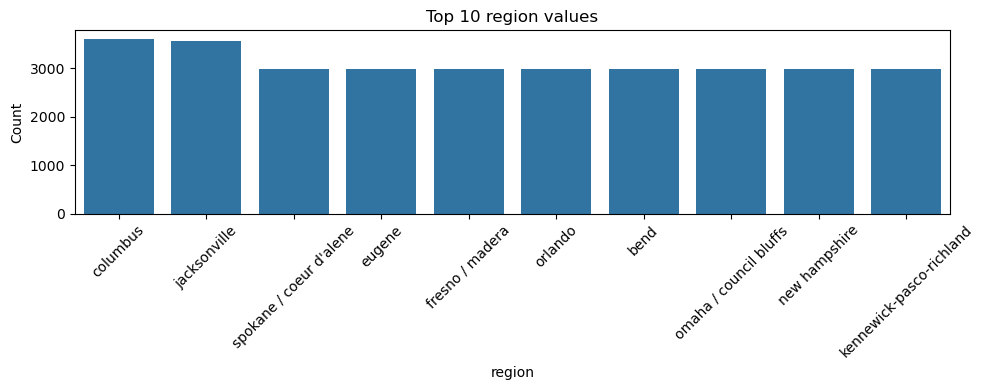

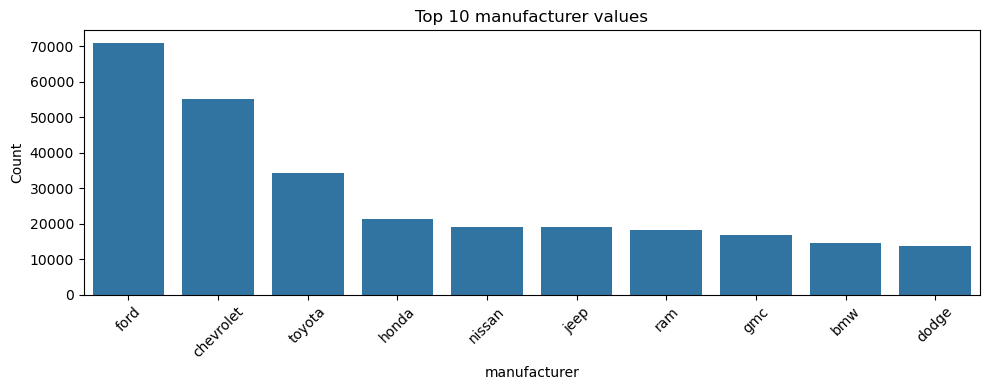

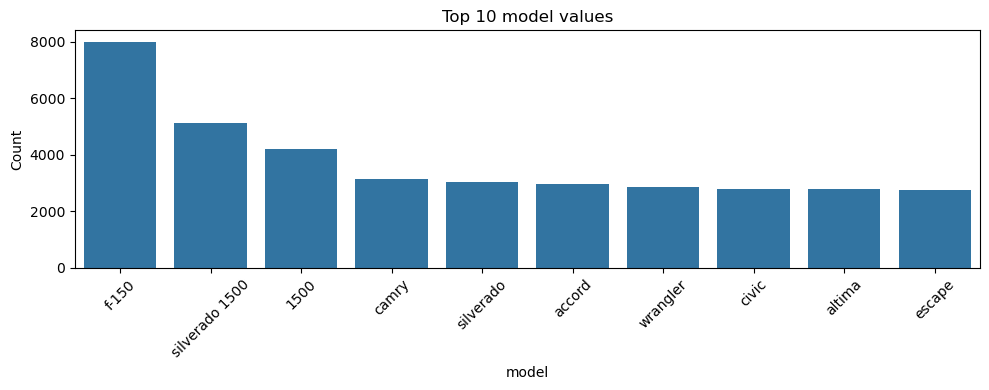

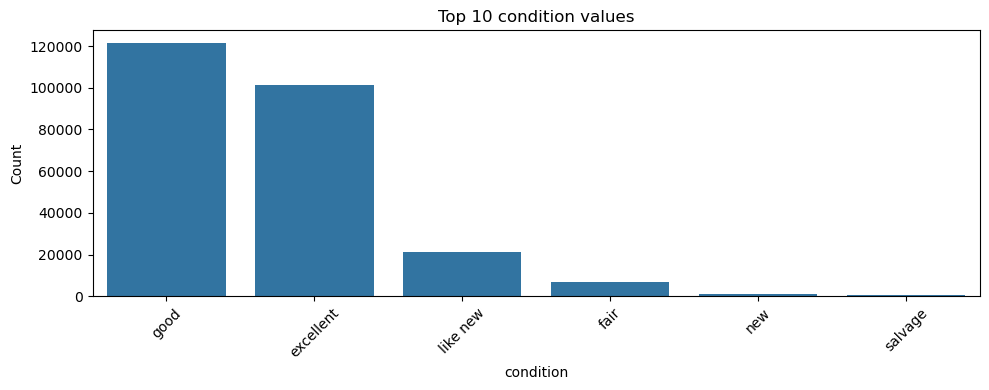

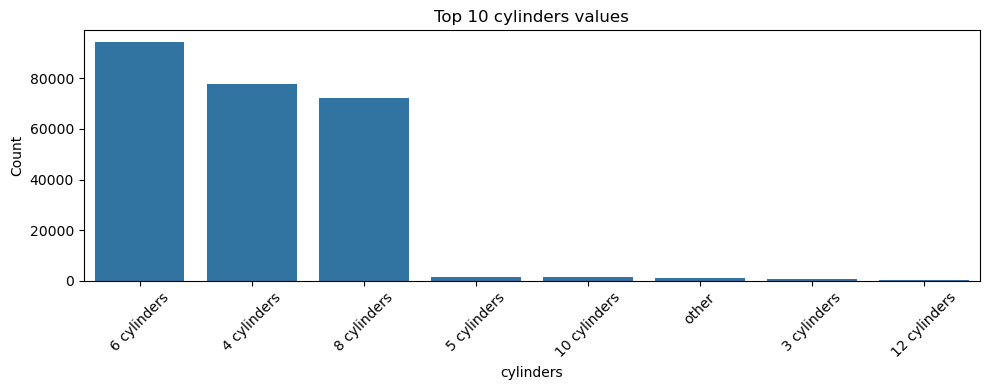

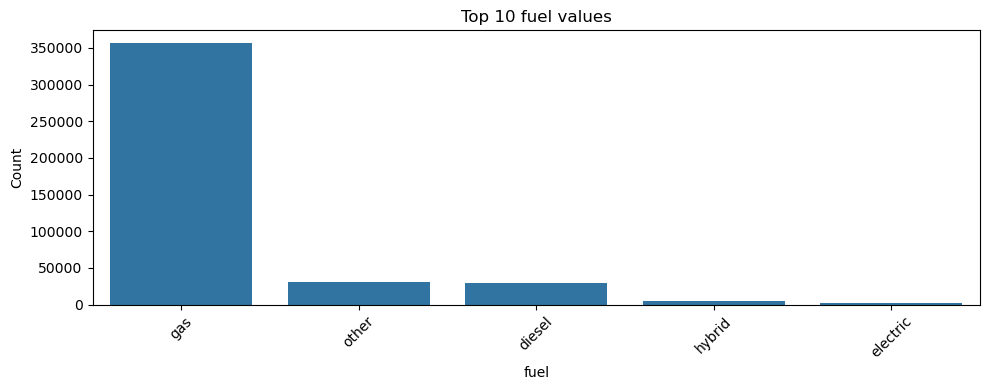

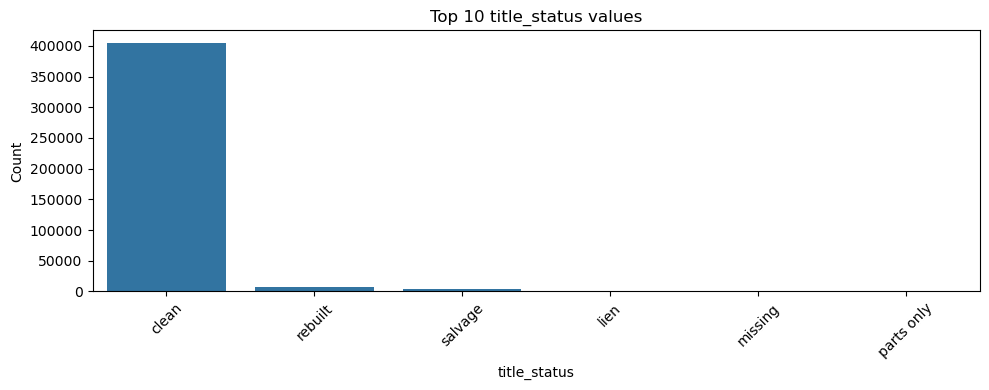

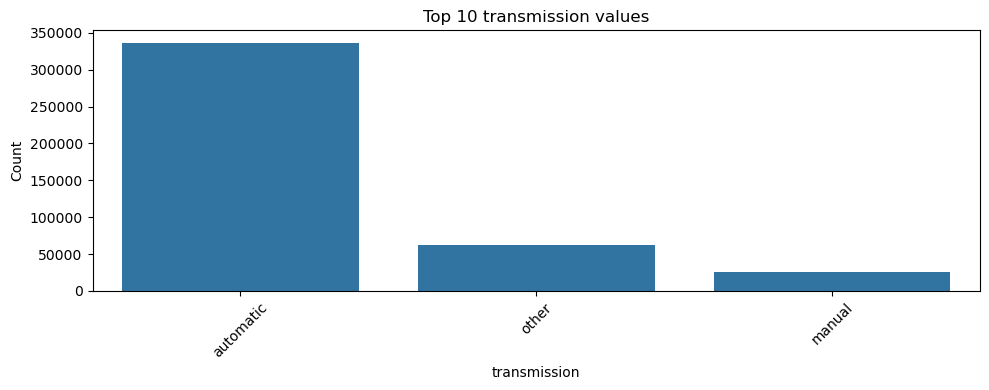

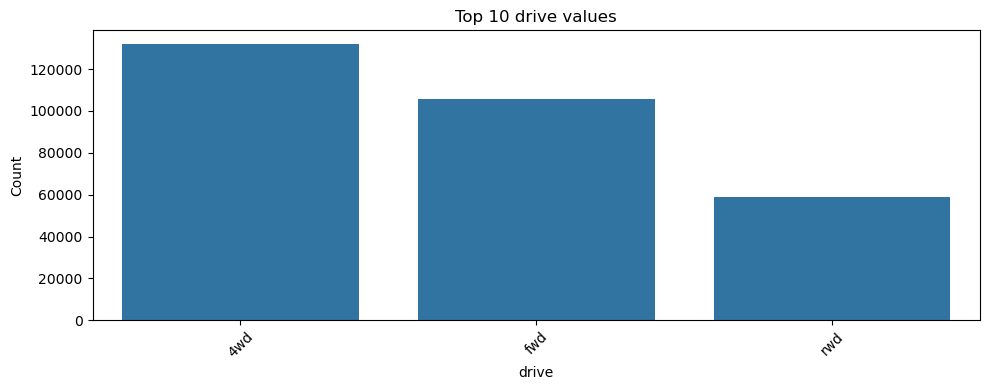

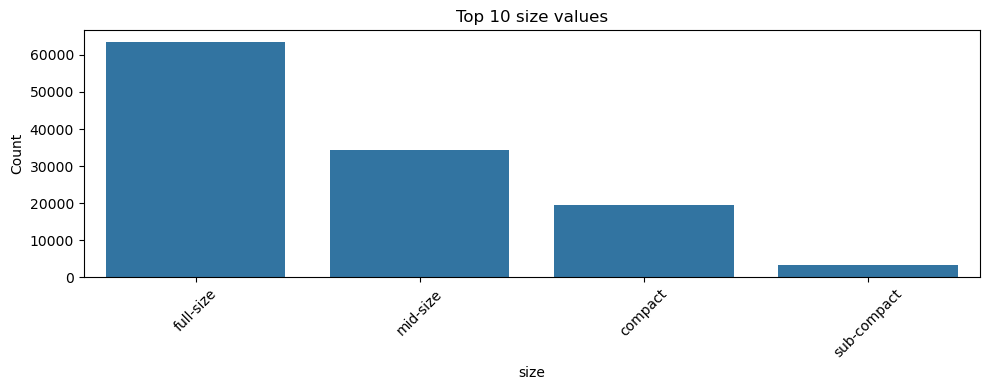

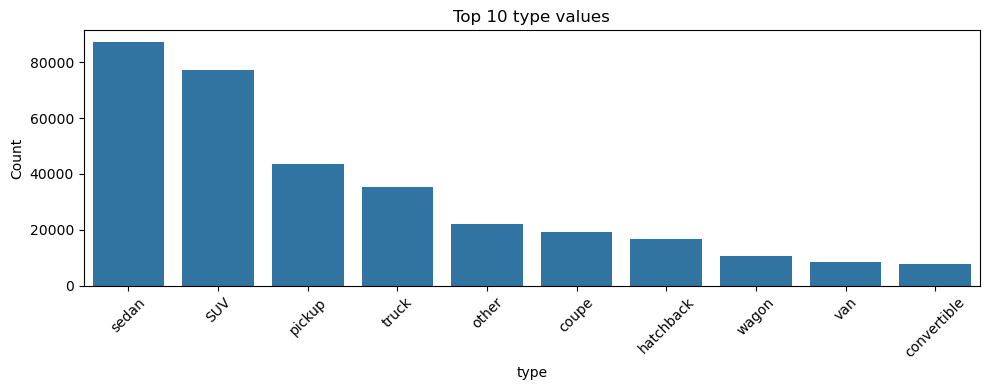

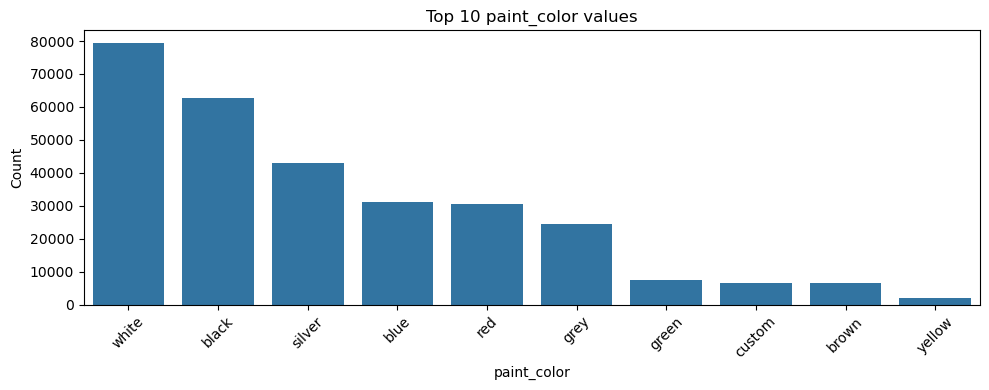

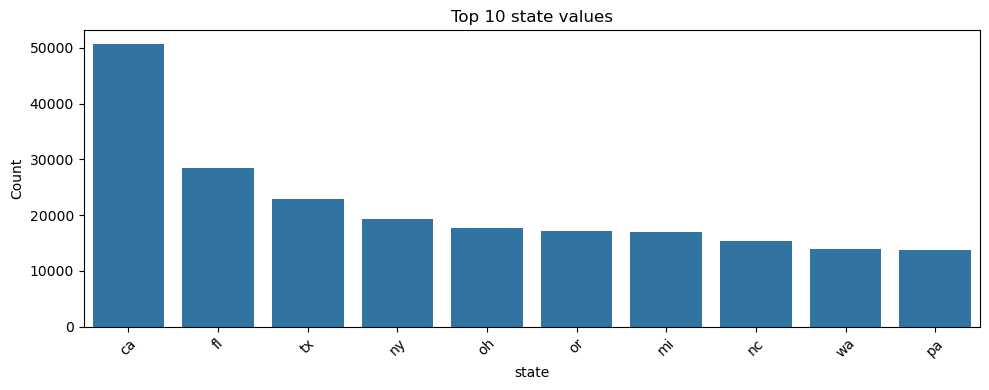

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns that might affect price
cat_cols = [
    'region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
    'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'
]

# Plot bar plots for each categorical column (top 10 categories by count)
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        value_counts = df[col].value_counts().head(10)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Top 10 {col} values')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Correlation of numeical columns. Year and Odometer are the other 2 numerical columns other than price. Compute and print correlation of price with year and odometer and show as a heatmap

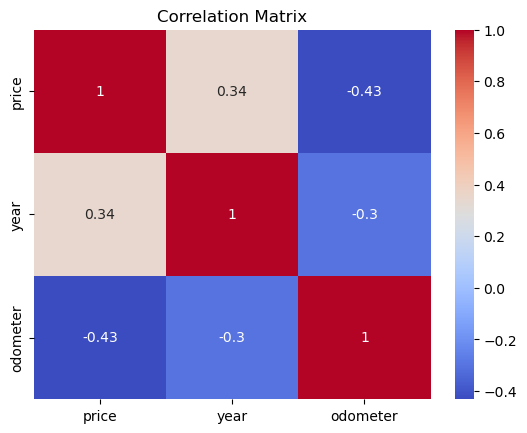

In [24]:
# Drop rows with nulls in price, year, or odometer
df_filtered = df.dropna(subset=['price', 'year', 'odometer'])

# Apply filters for plausible values
df_filtered = df_filtered[
    (df_filtered['odometer'] < 1_111_111) &
    (df_filtered['price'] != 0) &
    (df_filtered['price'] < 120_000)
]

# Compute and print correlation of price with year and odometer and show as a heatmap
sns.heatmap(df_filtered[['price', 'year', 'odometer']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As expected the price is negatively correlated with year and odometer.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Initial cleanup
* Filter out all rows with missing values in the following columns: year, manufacturer, model, fuel, odometer, title_status, transmission. The columns contain few missing values so dropping the missing values does not cause a huge drop in data set size. Plus these columns SHOULD have an impact on price
* Remove rows with implausible values on price and odometer
* Look at the shape of the data frame to assess new total rows after the initial cleanup.

In [25]:
import pandas as pd
from datetime import datetime

# 1. Filter out rows with missing values in key columns
required_cols = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission']
df_clean = df.dropna(subset=required_cols)

# 2. Remove rows with implausible values for price and odometer
df_clean = df_clean[
    (df_clean['price'] > 0) &
    (df_clean['price'] < 120_000) &
    (df_clean['odometer'] < 1_111_111)
]
print(df_clean.shape)

(360489, 18)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Prior to modeling, split the data into training, validation and test datasets. Look at their shapes to get an assessment of data sizes

In [37]:
from sklearn.model_selection import train_test_split

# Split into train (60%), temp (40%)
df_train, df_temp = train_test_split(df_clean, test_size=0.4, random_state=42)

# Split temp into validation (20%) and test (20%)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (216293, 18)
Validation shape: (72098, 18)
Test shape: (72098, 18)


Train a very simple linear regression model that depends upon odometer and year alone, just to get a sense of how it behaves, and an assessment of the root mean square error, and mean absolute error that we may get.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Features and target for the simple model
features = ['year', 'odometer']
target = 'price'

# Prepare train, validation, and test sets
X_train = df_train[features]
y_train = df_train[target]
X_val = df_val[features]
y_val = df_val[target]
X_test = df_test[features]
y_test = df_test[target]

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_val_pred = lr.predict(X_val)

# Evaluate
rmse = root_mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {rmse:,.2f}")
print(f"Validation MAE: {mae:,.2f}")
print(f"Validation R^2: {r2:.3f}")

# Show coefficients
print("Coefficients:", dict(zip(features, lr.coef_)))
print("Intercept:", lr.intercept_)

Validation RMSE: 12,206.69
Validation MAE: 8,891.29
Validation R^2: 0.286
Coefficients: {'year': 388.3187311429874, 'odometer': -0.08495851252930067}
Intercept: -754336.4650590407


Results evaluation:  The simple model achieves a MSE of 12000+ and an MAE of 8000+. This is very high for real world use. For real world use we would ideally want to have a model where MAE is less than $1000

Now let us try a more advanced model. 
First improve the data pre-processing by setting up a sci kit learn pipeline that does the following -- 
* Price is the target that is to be predicated in the model
* Perform one hot encoding of the following columns: manufacturer, type, fuel, size, condition, title_status.
* Use the above columns plus the numeric columns odometer and title as feature columns
* Perform a PCA and K Means clustering to reduce dimensionality. 
* Run the data sets thru this pipeline
* Assign the resulting data set to df_train_final, df_val_final, and df_test_final

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Custom transformer to add KMeans cluster labels as a feature
class KMeansClusterAdder(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.kmeans = None

    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        clusters = self.kmeans.predict(X)
        return np.c_[X, clusters]

# Feature columns to use
cat_cols = ['manufacturer', 'type', 'fuel', 'size', 'condition', 'title_status']
num_cols = ['odometer', 'year']

# Select only the columns needed for modeling
feature_cols = cat_cols + num_cols
# Ensure all columns exist in the data
feature_cols = [col for col in feature_cols if col in df_train.columns]

X_train = df_train[feature_cols]
X_val = df_val[feature_cols]
X_test = df_test[feature_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in num_cols if col in X_train.columns]),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [col for col in cat_cols if col in X_train.columns])
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('kmeans', KMeansClusterAdder(n_clusters=4, random_state=42))
])

# Fit and transform
X_train_aug = pipeline.fit_transform(X_train)
X_val_aug = pipeline.transform(X_val)
X_test_aug = pipeline.transform(X_test)

# Build final DataFrames with price
n_pca = pipeline.named_steps['pca'].n_components_
pca_cols = [f'pca_{i+1}' for i in range(n_pca)]
final_cols = pca_cols + ['kmeans_cluster']

df_train_final = pd.DataFrame(X_train_aug, columns=final_cols, index=df_train.index)
df_train_final['price'] = df_train['price'].values

df_val_final = pd.DataFrame(X_val_aug, columns=final_cols, index=df_val.index)
df_val_final['price'] = df_val['price'].values

df_test_final = pd.DataFrame(X_test_aug, columns=final_cols, index=df_test.index)
df_test_final['price'] = df_test['price'].values

print(df_train_final.shape, df_val_final.shape, df_test_final.shape)
df_train_final.head()

(216293, 37) (72098, 37) (72098, 37)


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,kmeans_cluster,price
175374,0.692417,-0.349119,0.685529,-0.004286,0.134421,-0.200892,-0.148965,-0.404063,-0.247996,-0.311258,-0.295499,-0.212880,-0.134342,-0.338664,-0.327203,-0.358595,0.079805,0.502136,0.127988,0.336806,0.016670,-0.126751,-0.154865,0.003582,-0.046523,-0.100087,0.073662,-0.115055,0.011512,0.062236,-0.017480,0.007262,-0.056073,-0.021944,-0.018209,3.0,6495
65052,-0.688025,-0.037057,0.030945,0.336690,-0.923377,-0.606522,0.352984,-0.148596,-0.007010,0.594370,0.678106,-0.136454,-0.147367,0.035442,-0.002281,-0.050601,0.028958,-0.050228,-0.032026,0.054669,-0.237518,0.000090,-0.085727,-0.038527,-0.242637,0.293287,0.157491,-0.006356,0.049728,0.029245,0.037443,0.035338,-0.124785,-0.046780,0.000963,1.0,57495
117425,0.639273,-0.050289,-0.742499,-0.669242,-0.540901,0.154194,-0.324298,-0.183972,-0.350549,-0.162597,1.251866,0.284996,0.370474,-0.283375,0.004850,-0.099867,-0.077072,0.209770,-0.025154,-0.089451,0.681163,0.103531,0.034764,0.021630,0.027999,-0.013638,0.118900,-0.078360,0.078454,0.059130,0.020660,0.016027,-0.029258,-0.050658,-0.035884,3.0,15900
258257,-1.135719,0.000171,1.019165,-0.220343,0.011918,0.429274,0.056338,0.326325,0.004187,-0.132585,-0.022688,0.270332,-0.038316,0.075207,0.003803,0.013884,-0.028514,-0.015296,0.029327,0.027689,-0.033012,-0.021475,0.041051,-0.011474,0.044145,-0.029408,0.024830,-0.009674,0.037372,0.067710,0.028043,0.031381,-0.029981,-0.045195,0.010855,1.0,35995
25992,-0.239429,0.382063,-0.732456,-0.795706,0.697211,-0.172962,0.186466,0.251447,-0.294048,0.635382,-0.072159,0.107839,-0.010788,0.251960,-0.154116,-0.085388,-0.062818,-0.034244,0.053504,0.049743,-0.216141,-0.109606,-0.012996,0.032714,0.069183,-0.070990,-0.103976,0.071333,-0.030567,0.016875,0.067492,0.014587,-0.253339,-0.119802,-0.029728,1.0,10950


Fit a Ridge regression model followed by hyper parameter tuning using grid search

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Use all columns except 'price' as features
features = [col for col in df_train_final.columns if col != 'price']
X_train = df_train_final[features]
y_train = df_train_final['price']
X_val = df_val_final[features]
y_val = df_val_final['price']
X_test = df_test_final[features]
y_test = df_test_final['price']

# 1. Fit a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
y_val_pred = ridge.predict(X_val)
y_test_pred = ridge.predict(X_test)

print("Basic Ridge Regression:")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred):,.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):,.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# 2. Hyperparameter tuning for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

print("\nBest Ridge alpha:", ridge_cv.best_params_['alpha'])

# Evaluate best model on validation and test sets
y_val_pred_cv = ridge_cv.predict(X_val)
y_test_pred_cv = ridge_cv.predict(X_test)

print("Tuned Ridge Regression:")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_cv):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred_cv):,.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred_cv):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred_cv):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred_cv):,.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_cv):.3f}")

Basic Ridge Regression:
Validation RMSE: 10,071.12
Validation MAE: 6,943.34
Validation R^2: 0.514
Test RMSE: 10,167.52
Test MAE: 6,967.86
Test R^2: 0.504

Best Ridge alpha: 10
Tuned Ridge Regression:
Validation RMSE: 10,071.14
Validation MAE: 6,943.19
Validation R^2: 0.514
Test RMSE: 10,167.51
Test MAE: 6,967.68
Test R^2: 0.504


Results evaluation: The above results are better than the very simple model, but still not really usable in the real world.

Now attempt a lasso regression

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Use all columns except 'price' as features
features = [col for col in df_train_final.columns if col != 'price']
X_train = df_train_final[features]
y_train = df_train_final['price']
X_val = df_val_final[features]
y_val = df_val_final['price']
X_test = df_test_final[features]
y_test = df_test_final['price']

# 1. Fit a basic Lasso regression model
lasso = Lasso(max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)
y_val_pred = lasso.predict(X_val)
y_test_pred = lasso.predict(X_test)

print("Basic Lasso Regression:")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred):,.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):,.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# 2. Hyperparameter tuning for Lasso regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000, random_state=42), param_grid, cv=3, 
                        scoring='neg_root_mean_squared_error', n_jobs=-1)
lasso_cv.fit(X_train, y_train)

print("\nBest Lasso alpha:", lasso_cv.best_params_['alpha'])

# Evaluate best model on validation and test sets
y_val_pred_cv = lasso_cv.predict(X_val)
y_test_pred_cv = lasso_cv.predict(X_test)

print("Tuned Lasso Regression:")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_cv):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred_cv):,.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred_cv):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred_cv):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred_cv):,.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_cv):.3f}")

Basic Lasso Regression:
Validation RMSE: 10,071.34
Validation MAE: 6,942.62
Validation R^2: 0.514
Test RMSE: 10,167.51
Test MAE: 6,966.90
Test R^2: 0.504

Best Lasso alpha: 0.1
Tuned Lasso Regression:
Validation RMSE: 10,071.13
Validation MAE: 6,943.28
Validation R^2: 0.514
Test RMSE: 10,167.51
Test MAE: 6,967.78
Test R^2: 0.504


Results evaluation: The lasso regression model is not very much better than the ridge regression model

Now attempt a more advanced Random Forest model on the same data set 

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Use all columns except 'price' as features
features = [col for col in df_train_final.columns if col != 'price']
X_train = df_train_final[features]
y_train = df_train_final['price']
X_val = df_val_final[features]
y_val = df_val_final['price']
X_test = df_test_final[features]
y_test = df_test_final['price']

# 1. Fit a basic Random Forest regressor
rf = RandomForestRegressor(n_estimators=20, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

print("Basic Random Forest Regression:")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred):,.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):,.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# 2. Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20]
}
rf_cv = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, 
                     cv=2, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)

print("\nBest Random Forest params:", rf_cv.best_params_)

# Evaluate best model on validation and test sets
y_val_pred_cv = rf_cv.predict(X_val)
y_test_pred_cv = rf_cv.predict(X_test)

print("Tuned Random Forest Regression:")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_cv):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred_cv):,.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred_cv):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test, y_test_pred_cv):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred_cv):,.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_cv):.3f}")

Basic Random Forest Regression:
Validation RMSE: 6,385.79
Validation MAE: 3,506.86
Validation R^2: 0.805
Test RMSE: 6,470.89
Test MAE: 3,522.49
Test R^2: 0.799
Fitting 2 folds for each of 4 candidates, totalling 8 fits

Best Random Forest params: {'max_depth': 20, 'n_estimators': 20}
Tuned Random Forest Regression:
Validation RMSE: 6,385.79
Validation MAE: 3,506.86
Validation R^2: 0.805
Test RMSE: 6,470.89
Test MAE: 3,522.49
Test R^2: 0.799


Results evaluation: The random forest model is significantly better and reduces both the RMSE and the MAE. The MAE is now down to 3522. But it is still too high for real world use. The random forest is performing better, because it is better at at non linear relationships and also account for interactions between features

Generate a second set of data. This time include a sklearn pipeline that includes all the previous transformations, plus in addition use a target encoding for the model column. We were not able to one shot encode previously, because of too many unique values. We will call this pipeline two and the resulting data set df_train_final2, df_val_final2, and df_test_final2.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Target encoding for 'model' column
def target_encode_model(train, val, test, target_col='price', cat_col='model'):
    means = train.groupby(cat_col)[target_col].mean()
    global_mean = train[target_col].mean()
    train[f'{cat_col}_enc'] = train[cat_col].map(means)
    val[f'{cat_col}_enc'] = val[cat_col].map(means).fillna(global_mean)
    test[f'{cat_col}_enc'] = test[cat_col].map(means).fillna(global_mean)
    return train, val, test

# Custom transformer to add KMeans cluster labels as a feature
class KMeansClusterAdder(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.kmeans = None

    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        clusters = self.kmeans.predict(X)
        return np.c_[X, clusters]

# Columns
cat_cols = ['manufacturer', 'type', 'fuel', 'size', 'condition', 'title_status']
num_cols = ['odometer', 'year']
target_col = 'price'
model_col = 'model'

# Target encode 'model'
df_train2, df_val2, df_test2 = target_encode_model(df_train.copy(), df_val.copy(), df_test.copy(), target_col=target_col, cat_col=model_col)

# Prepare features
feature_cols2 = cat_cols + num_cols + ['model_enc']
X_train2 = df_train2[feature_cols2]
X_val2 = df_val2[feature_cols2]
X_test2 = df_test2[feature_cols2]

# Preprocessing pipeline
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols + ['model_enc']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
    ]
)

pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('kmeans', KMeansClusterAdder(n_clusters=4, random_state=42))
])

# Fit and transform
X_train2_aug = pipeline2.fit_transform(X_train2)
X_val2_aug = pipeline2.transform(X_val2)
X_test2_aug = pipeline2.transform(X_test2)

# Build final DataFrames with price
n_pca2 = pipeline2.named_steps['pca'].n_components_
pca_cols2 = [f'pca2_{i+1}' for i in range(n_pca2)]
final_cols2 = pca_cols2 + ['kmeans_cluster']

df_train_final2 = pd.DataFrame(X_train2_aug, columns=final_cols2, index=df_train.index)
df_train_final2['price'] = df_train['price'].values

df_val_final2 = pd.DataFrame(X_val2_aug, columns=final_cols2, index=df_val.index)
df_val_final2['price'] = df_val['price'].values

df_test_final2 = pd.DataFrame(X_test2_aug, columns=final_cols2, index=df_test.index)
df_test_final2['price'] = df_test['price'].values

print(df_train_final2.shape, df_val_final2.shape, df_test_final2.shape)
df_train_final2.head()

(216293, 35) (72098, 35) (72098, 35)


,pca2_1,pca2_2,pca2_3,pca2_4,pca2_5,pca2_6,pca2_7,pca2_8,pca2_9,pca2_10,pca2_11,pca2_12,pca2_13,pca2_14,pca2_15,pca2_16,pca2_17,pca2_18,pca2_19,pca2_20,pca2_21,pca2_22,pca2_23,pca2_24,pca2_25,pca2_26,pca2_27,pca2_28,pca2_29,pca2_30,pca2_31,pca2_32,pca2_33,kmeans_cluster,price
175374,1.233263,-0.448042,-0.503822,0.673247,0.120424,0.165485,0.084753,-0.174944,-0.468222,-0.220266,-0.366195,-0.287492,-0.258035,-0.112762,-0.335436,-0.269624,-0.370273,0.396827,0.308231,-0.241560,-0.320814,0.004814,-0.112761,-0.180481,-0.092098,-0.050676,-0.054643,0.074626,-0.117300,-0.057913,0.077462,0.018867,0.044506,0.0,6495
65052,-2.117206,1.883585,0.512761,0.072905,-0.250001,0.017103,0.750723,0.130264,-0.143553,0.003911,0.630759,0.666781,-0.100188,-0.160897,-0.064871,0.038090,-0.023897,0.016866,-0.110159,0.142503,-0.066867,-0.225680,-0.031542,-0.013259,0.007981,-0.235433,0.257227,0.155719,-0.021451,0.055425,0.014913,0.013294,0.011956,3.0,57495
117425,0.519464,0.370525,0.028417,-0.741039,-0.826455,-0.265303,-0.133385,-0.293217,-0.242949,-0.335853,-0.177646,1.258205,0.257323,0.379439,-0.280633,0.057677,-0.058570,0.129393,0.079029,-0.166042,0.100137,0.675602,0.107927,0.018286,0.024645,0.027884,-0.017079,0.120671,-0.098357,0.049658,0.053649,0.019528,0.015109,0.0,15900
258257,-0.650001,-1.056521,-0.260651,1.003084,-0.081378,-0.393347,-0.151972,-0.013561,0.309461,-0.006693,-0.140059,-0.018561,0.263334,-0.039769,0.089596,-0.013032,0.006422,-0.042605,0.047145,-0.031249,-0.024591,-0.036401,-0.012306,0.030739,-0.012158,0.043186,-0.020864,0.024431,-0.023525,0.032229,0.063774,0.032537,0.042317,1.0,35995
25992,0.374516,-1.162767,0.061627,-0.759415,-0.419011,0.509726,-0.083427,0.267932,0.285297,-0.305242,0.690049,-0.084256,0.162879,-0.032127,0.159700,-0.151554,-0.089643,-0.084238,0.077836,-0.037233,-0.046180,-0.220606,-0.100238,-0.034444,0.010313,0.067364,-0.060048,-0.105353,0.075605,-0.000710,0.011921,0.076469,0.043372,1.0,10950


Train the random forest model followed by hyperparamter tuning ( best performing model from previous attempts)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Use all columns except 'price' as features
features2 = [col for col in df_train_final2.columns if col != 'price']
X_train2 = df_train_final2[features2]
y_train2 = df_train_final2['price']
X_val2 = df_val_final2[features2]
y_val2 = df_val_final2['price']
X_test2 = df_test_final2[features2]
y_test2 = df_test_final2['price']

# 1. Fit a basic Random Forest regressor
rf2 = RandomForestRegressor(n_estimators=20, max_depth=20, random_state=42, n_jobs=-1)
rf2.fit(X_train2, y_train2)
y_val_pred2 = rf2.predict(X_val2)
y_test_pred2 = rf2.predict(X_test2)

print("Basic Random Forest Regression (pipeline2):")
print(f"Validation RMSE: {root_mean_squared_error(y_val2, y_val_pred2):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val2, y_val_pred2):,.2f}")
print(f"Validation R^2: {r2_score(y_val2, y_val_pred2):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test2, y_test_pred2):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test2, y_test_pred2):,.2f}")
print(f"Test R^2: {r2_score(y_test2, y_test_pred2):.3f}")

# 2. Hyperparameter tuning for Random Forest
param_grid2 = {
    'n_estimators': [20, 50],
    'max_depth': [10, 20, 30]
}
rf_cv2 = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid2, 
                      cv=2, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
rf_cv2.fit(X_train2, y_train2)

print("\nBest Random Forest params (pipeline2):", rf_cv2.best_params_)

# Evaluate best model on validation and test sets
y_val_pred_cv2 = rf_cv2.predict(X_val2)
y_test_pred_cv2 = rf_cv2.predict(X_test2)

print("Tuned Random Forest Regression (pipeline2):")
print(f"Validation RMSE: {root_mean_squared_error(y_val2, y_val_pred_cv2):,.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val2, y_val_pred_cv2):,.2f}")
print(f"Validation R^2: {r2_score(y_val2, y_val_pred_cv2):.3f}")
print(f"Test RMSE: {root_mean_squared_error(y_test2, y_test_pred_cv2):,.2f}")
print(f"Test MAE: {mean_absolute_error(y_test2, y_test_pred_cv2):,.2f}")
print(f"Test R^2: {r2_score(y_test2, y_test_pred_cv2):.3f}")

Basic Random Forest Regression (pipeline2):
Validation RMSE: 5,552.85
Validation MAE: 2,754.07
Validation R^2: 0.852
Test RMSE: 5,605.21
Test MAE: 2,753.29
Test R^2: 0.849
Fitting 2 folds for each of 6 candidates, totalling 12 fits

Best Random Forest params (pipeline2): {'max_depth': 30, 'n_estimators': 50}
Tuned Random Forest Regression (pipeline2):
Validation RMSE: 5,388.27
Validation MAE: 2,417.86
Validation R^2: 0.861
Test RMSE: 5,429.10
Test MAE: 2,418.04
Test R^2: 0.859


Results Evaluation: The updated model is signficantly better than previous models, with an RMSE of 5388 and a test MAE of 2418. It is coming closer to being used in the real world.

Now we want to understand which real world features are most important. Ideally we should be able to get that information from the model that we trained above. But we cannot get this directly from the RF2 model above, because RF2 is trained on PCA components, and KMeans Cluster labels. So we will setup a new pipeline without the PCA and KMeans clustering, train a simple random forest model and print out the real world features ranked by importance.

In [45]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# --- Custom Target Encoder for 'model' column ---
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, col='model', target='price'):
        self.col = col
        self.target = target
        self.mapping_ = None
        self.global_mean_ = None

    def fit(self, X, y=None):
        df = X.copy()
        if y is not None:
            df[self.target] = y
        self.mapping_ = df.groupby(self.col)[self.target].mean()
        self.global_mean_ = df[self.target].mean()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.col + '_enc'] = X[self.col].map(self.mapping_).fillna(self.global_mean_)
        return X[[self.col + '_enc']]

# --- Feature columns ---
cat_cols = ['manufacturer', 'type', 'fuel', 'size', 'condition', 'title_status']
num_cols = ['odometer', 'year']
model_col = 'model'
target_col = 'price'

# --- Prepare data ---
# Ensure all columns exist
feature_cols3 = cat_cols + num_cols + [model_col]
for col in feature_cols3:
    if col not in df_train.columns:
        print(f"Missing column: {col}")

X_train3 = df_train[feature_cols3]
X_val3 = df_val[feature_cols3]
X_test3 = df_test[feature_cols3]
y_train3 = df_train[target_col]
y_val3 = df_val[target_col]
y_test3 = df_test[target_col]

# --- Pipeline for preprocessing ---
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),
        ('model_enc', TargetEncoder(col=model_col, target=target_col), [model_col])
    ]
)

pipeline3 = Pipeline([
    ('preprocessor', preprocessor3)
])

# --- Fit and transform ---
X_train3_final = pipeline3.fit_transform(X_train3, y_train3)
X_val3_final = pipeline3.transform(X_val3)
X_test3_final = pipeline3.transform(X_test3)

# --- Get feature names ---
ohe = pipeline3.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
num_feature_names = num_cols
model_feature_name = [model_col + '_enc']
all_feature_names3 = list(num_feature_names) + list(cat_feature_names) + model_feature_name

# --- Build DataFrames ---
df_train_final3 = pd.DataFrame(X_train3_final, columns=all_feature_names3, index=df_train.index)
df_train_final3['price'] = y_train3.values

df_val_final3 = pd.DataFrame(X_val3_final, columns=all_feature_names3, index=df_val.index)
df_val_final3['price'] = y_val3.values

df_test_final3 = pd.DataFrame(X_test3_final, columns=all_feature_names3, index=df_test.index)
df_test_final3['price'] = y_test3.values

# --- Train Random Forest and print feature importances ---
rf3 = RandomForestRegressor(n_estimators=20, max_depth=20, random_state=42, n_jobs=-1)
rf3.fit(df_train_final3[all_feature_names3], y_train3)

importances3 = rf3.feature_importances_
feat_imp3 = pd.Series(importances3, index=all_feature_names3).sort_values(ascending=False)
print("Top 15 Feature Importances (pipeline3):")
print(feat_imp3.head(15))

Top 15 Feature Importances (pipeline3):
model_enc                 0.642167
year                      0.175393
odometer                  0.079288
condition_good            0.012541
fuel_gas                  0.012053
condition_nan             0.005421
type_nan                  0.005064
manufacturer_ford         0.004122
type_truck                0.004058
size_full-size            0.003464
manufacturer_chevrolet    0.003422
type_pickup               0.003218
fuel_other                0.003133
manufacturer_gmc          0.002960
size_nan                  0.002932
dtype: float64


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.



Below is the evaluation with  list of our findings and next steps:

**Model Evaluation**
After data cleaning and feature we built several regression models to predict used car prices. Our best-performing model was a Random Forest regressor using a pipeline that included one-hot encoding, target encoding for the model column, PCA for dimensionality reduction, and KMeans clustering. This model achieved a validation RMSE of approximately $5,388 and a test MAE of $2,418, which is a significant improvement over simpler models.

**Key Insights:**
- The top 3 influential features for predicting price were model, year, and odometer and in that rank. This was followed by condition, fuel and manufacturer. Trucks also appear to command higher prices than other types
- Target encoding for the model column (due to its high cardinality) improved model performance over one-hot encoding.
- Dimensionality reduction and clustering helped capture complex relationships in the data.

**Business Objective Review:**
- Our objective was to identify key drivers of used car prices and provide a predictive tool for pricing decisions.
- The current model provides actionable insights and a reasonable level of accuracy, though further improvements are needed for real world use ( and should be possible)

**Revisitation and Adjustment  and next steps**

There is definately room for re-visitation and adjustment to  mprove the model accuracy-- some ideas:
- Explore the use of additional feature columns (e.g., state, region).
- Explore additional transformations in the data (e.g transform year to age, log transform price)
- Consider more advanced models.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.


#### Used Car Price Drivers: Key Findings & Recommendations

#### Executive Summary
We analyzed over 400,000 used car listings to identify what most influences resale prices. Our best machine learning model predicts prices with a mean absolute error of ~$2,400, a significant improvement over simpler approaches.

#### Key Findings

- **Most Important Factors:**  
  1. **Model** (as captured by target encoding)  
  2. **Year** (newer cars are worth more)  
  3. **Odometer** (lower mileage increases value)  
  4. **Condition**, **Fuel type** and **Manufacturer** also play notable roles
  5. **Trucks**, also command higher prices than other types

- **Data-Driven Insights:**  
  - The specific model of a car is the single most important predictor of price.
  - Cars with lower mileage and newer years command higher prices.

#### Recommendations

- **Inventory:**  
  - Prioritize acquiring newer, low-mileage vehicles in good condition.
  - Stock popular models and manufacturers that retain value.
  - Highlight condition and mileage in marketing to justify pricing.

- **Pricing:**  
  - Use the provided model to estimate fair prices for trade-ins and sales.